# Introduction

Our goal is to build machine learning models that will predict whether income exceeds $50K/yr based on census data.<br>
The dataset is gathered from [UCI Archive](http://archive.ics.uci.edu/ml/datasets/Adult). The data contains following information
- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# EDA

In [5]:
df = pd.read_csv('data/adult.data', header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', \
           'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'] 
df.columns = columns
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Separate categorical and numberical columns

cat_col = df.dtypes[df.dtypes == 'object'] 
num_col = df.dtypes[df.dtypes != 'object']

**Inspection of Categorical Columns**

In [10]:
# loop through each categorical columns
for col in list(cat_col.index):
    # print column n
    print(col.title())
    # count each unique values of the current column
    total= df[col].value_counts()
    # find percent occurence of each unique value
    percent = df[col].value_counts() / df.shape[0]
    # make a dataframe of based of above 2 lists 
    sub_df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    # print the dataframe
    print(sub_df)
    print('\n')

Workclass
                   total   percent
 Private           22696  0.697030
 Self-emp-not-inc   2541  0.078038
 Local-gov          2093  0.064279
 ?                  1836  0.056386
 State-gov          1298  0.039864
 Self-emp-inc       1116  0.034274
 Federal-gov         960  0.029483
 Without-pay          14  0.000430
 Never-worked          7  0.000215


Education
               total   percent
 HS-grad       10501  0.322502
 Some-college   7291  0.223918
 Bachelors      5355  0.164461
 Masters        1723  0.052916
 Assoc-voc      1382  0.042443
 11th           1175  0.036086
 Assoc-acdm     1067  0.032769
 10th            933  0.028654
 7th-8th         646  0.019840
 Prof-school     576  0.017690
 9th             514  0.015786
 12th            433  0.013298
 Doctorate       413  0.012684
 5th-6th         333  0.010227
 1st-4th         168  0.005160
 Preschool        51  0.001566


Marital.Status
                        total   percent
 Married-civ-spouse     14976  0.459937
 Nev

- **Native.Country, Occupation, Workclass** has unknown values represented by `?`
- 9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
- Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
- Divorced, separated again comes under category separated.
- Self-emp-not-inc, Self-emp-inc comes under category self employed
- Local-gov,State-gov,Federal-gov comes under category goverment emloyees

In [11]:
# Replace ? with Unknown
# columns that contains ?
edit_cols = ['native.country','occupation','workclass']
# loop through each column in the above list
for col in edit_cols:
    # replace ? with Unknown
    df.loc[df[col] == '?', col] = 'unknown'

In [12]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64


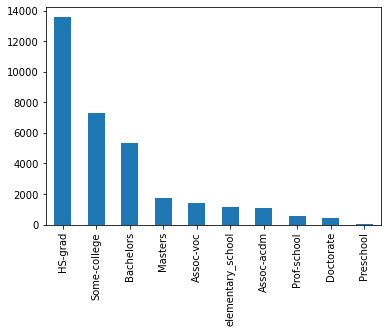

In [13]:
# we will replace 9th, 10th, 11th, 12th with HighSchool
# and 1st-4th,5th-6th,7th-8th with ElementarysSchool
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'] = df['education'].str.strip()
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

print(df['education'].value_counts())
df['education'].value_counts().plot(kind='bar')

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64


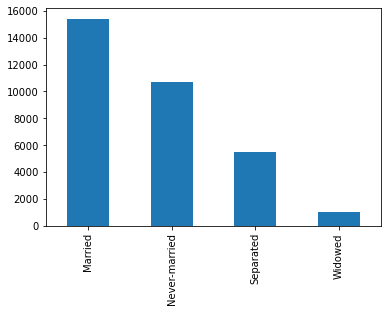

In [14]:
# we will make married status to married, separted, never-married, and widowed

married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital.status'] = df['marital.status'].str.strip()
df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

print(df['marital.status'].value_counts())
df['marital.status'].value_counts().plot(kind='bar')

Private           22696
Govt_employees     4351
Self_employed      3657
?                  1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64


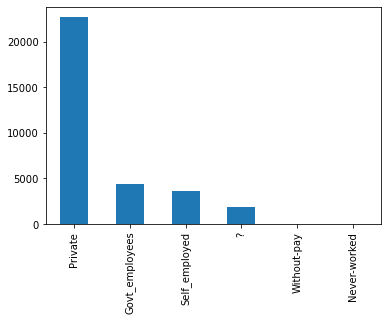

In [15]:
# put self employed, gov employess into one category
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'] = df['workclass'].str.strip()
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

print(df['workclass'].value_counts())
df['workclass'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

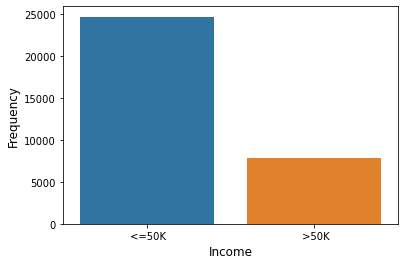

In [18]:
# Income class distribution
sns.countplot(x = 'income', data = df)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)